In [142]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__)
print(dlib.__version__)

4.7.0
19.24.0


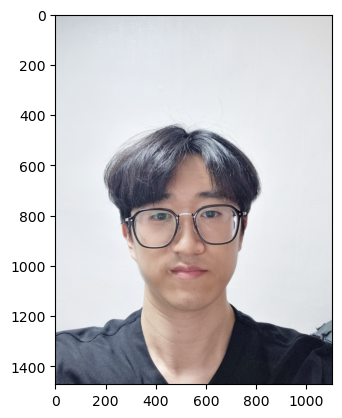

In [176]:
data_path = 'C:/users/juwon/practice_aiffel/camera_sticker/'
image_path = data_path + 'images/juwon.jpg'
img_bgr = cv2.imread(image_path)
img_show = img_bgr.copy()
plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))

## 얼굴 검출 face detection
얼굴은 dlib에 있는 face_detector는 HOG(Histogram of Oriented Gradients)와 SVM을 사용해서 얼굴을 찾는다.
HOG는 이미지에서 색상의 변화량을 나타낸 것인데, 이미지로부터 물체의 특징을 잘 잡아내는 능력이 있다.
얼굴을 인식해서 카메라 초점을 잡는 기능 등에 모두 이 방식이 응용되었다고 한다.

SVM은 선형분류기인데 얼굴이냐 아니냐를 판단해준다. 색상만으로 판단이 힘들지만 HOG 통해 벡터로 만들어 진다면
잘 작동한다고 한다.

In [144]:
detector_hog = dlib.get_frontal_face_detector() # detector 선언 및 기본 얼굴 감지기를 반환
print('success') # detector_hog로 얼굴의 bounding box 추출

success


In [145]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb,1) # image, 피라미드의 수
print('success')

success


In [146]:
print(dlib_rects)

rectangles[[(297, 708) (759, 1170)]]


width = 759 - 297 + 1 = 463

297 708 759 1170


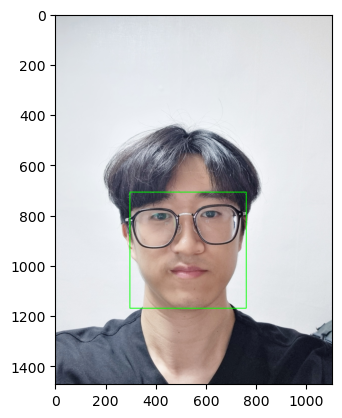

In [159]:
for dlib_rect in dlib_rects :
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t),(r,b),(0,255,0), 2, lineType=cv2.LINE_AA) # 이미지, 사각형의 시작좌표와 끝좌표, 선분의 색,두께, 
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
print(l,t,r,b)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 랜드마크 face landmark

이목구비의 위치를 추론하는 것을 face landmark localization라고 한다. face landmark는 face detection으로 찾아낸 bounding box 얼굴이미지를 이용한다.

Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다. keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.

top-down : bounding box를 찾고 box 내부의 keypoint를 예측 >> 이번에 사용할 방법

bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

In [148]:
model_path = 'C:/users/juwon/practice_aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
# 저장한 landmark 모델 불러오기
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print('success')

success


In [149]:
list_landmarks = []
# 랜드마크의 좌표를 저장할 리스트 생성
for dlib_rect in dlib_rects : 
    points = landmark_predictor(img_rgb, dlib_rect) # boundingbox 내 landmark 위치정보를 points에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) #위치정보를 (x,y) 좌표형태로 리스트에 저장
    list_landmarks.append(list_points) # 리스트에 랜드마크 좌표 저장

print(len(list_landmarks)) # 얼굴이 n개일경우 n개 생성
print(len((list_landmarks[0])))
print(list_landmarks[0][0:10])

1
68
[(304, 809), (308, 869), (317, 928), (329, 985), (349, 1039), (382, 1087), (422, 1128), (469, 1163), (531, 1172), (593, 1161)]


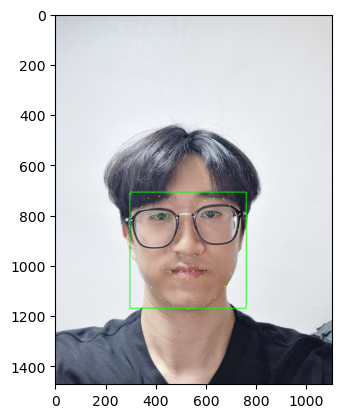

In [160]:
for landmark in list_landmarks :
    for point in landmark :
        cv2.circle(img_show, point, 2, (0,255,255), -1)
        # cv2.circle : OpenCV 원을 그리는 함수
        # img_show 이미지 위 각각의 landmark 위치에 크기가 2이고 (0,255,255) 색의 내부가 채워진(-1) 원 생성
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용하기

In [151]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks) : 
    x = l # dlib_rect.left()
    y = t # dlib_rect.top()
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(x,y) : (297,708)
(w,h) : (463,463)


(463, 463, 3)


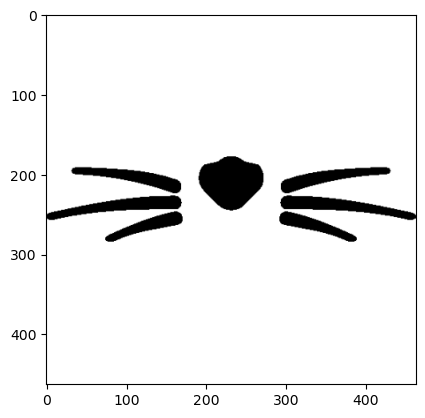

In [161]:
sticker_path = data_path + 'images/cat-whiskers.png'
sticker = cv2.imread(sticker_path)
sticker = cv2.resize(sticker,(w,h))
print(sticker.shape)
plt.imshow(cv2.cvtColor(sticker,cv2.COLOR_BGR2RGB))
plt.show()

In [153]:
sticker[200,198:200] # 검은색은 0 으로 표시

array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)

출처 :
<a href="https://www.flaticon.com/kr/free-icons/" title="코 아이콘">코 아이콘  제작자: Freepik - Flaticon</a>

## 원본이미지에 스티커 적용하기

In [154]:
# 좌표순서가 (y, x ,rgb channel) 임에 유의
sticker_area = img_show[t:t+h, l:l+w]
# sticker_area는 원본이미지에서 스티커를 적용할 부분을 crop한 것. 즉, bounding box와 같음
img_show[t:t+h, l:l+w]=np.where(sticker==0, sticker, sticker_area).astype(np.uint8)
# bounding box내에서 스티커가 존재하는 부분(값이 0) 은 스티커를 적용하고, 그렇지 않은 부분은 원본을 적용

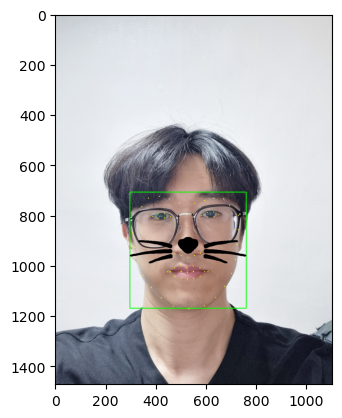

In [155]:
plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.show()

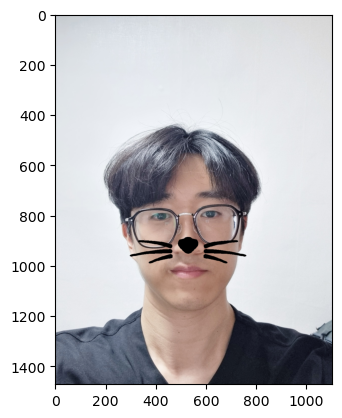

In [162]:
sticker_area = img_bgr[t:t+h, l:l+w]
img_bgr[t:t+h, l:l+w]=np.where(sticker==0, sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
plt.show()

적용에 성공한 모습이다. 하지만 스티커가 약간 작은 것 같다. 가로와 세로의 길이를 20%씩 늘려주기로 한다.

## 좌표 수정

In [177]:
w = h = int(1.2 * dlib_rect.width())
x = dlib_rect.left() - int(0.1 * dlib_rect.width())
y = dlib_rect.top() - int(0.1 * dlib_rect.width())

(555, 555, 3)


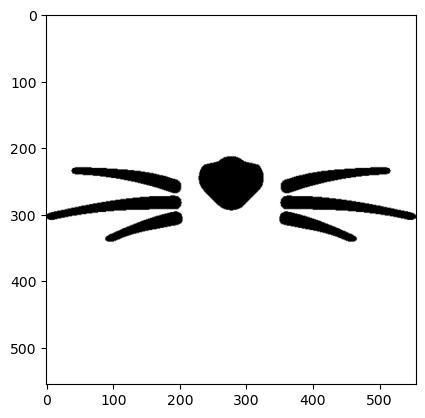

In [178]:
sticker = cv2.imread(sticker_path)
sticker = cv2.resize(sticker,(w,h))
print(sticker.shape)
plt.imshow(cv2.cvtColor(sticker,cv2.COLOR_BGR2RGB))
plt.show()

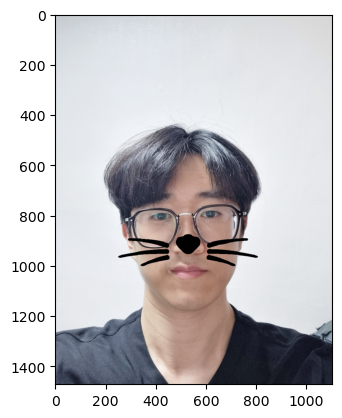

In [179]:
# 좌표순서가 (y, x ,rgb channel) 임에 유의
sticker_area = img_bgr[y:y+h, x:x+w]
# sticker_area는 원본이미지에서 스티커를 적용할 부분을 crop한 것. 즉, bounding box와 같음
img_bgr[y:y+h, x:x+w]=np.where(sticker==0, sticker, sticker_area).astype(np.uint8)
# bounding box내에서 스티커가 존재하는 부분(값이 0) 은 스티커를 적용하고, 그렇지 않은 부분은 원본을 적용
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
plt.show()